In [1]:
import pandas as pd
import numpy as np

In [34]:
true = pd.read_csv("../data/features_true_400.csv", index_col="Unnamed: 0")
true = true[['label', 'sentence_count',
       'avg_sentence_length', 'open_closed_ratio', 'simple_verbs',
       'compound_verbs', 'pause_count', 'avg_word_length',
       'pronoun_proportion', 'non_dict_word_proportion', 'adverb_proportion']]

true_0 = true[true['label'] == 0].drop(columns = "label")
true_1 = true[true['label'] == 1].drop(columns = "label")
print(true_0.shape, true_1.shape)
true_diff = true_1.mean(axis = 0) - true_0.mean(axis = 0)

(200, 10) (200, 10)


In [ ]:
v1 = pd.read_csv("../data/features_v1_4000.csv", index_col="Unnamed: 0")
v1 = v1[['label', 'sentence_count',
       'avg_sentence_length', 'open_closed_ratio', 'simple_verbs',
       'compound_verbs', 'pause_count', 'avg_word_length',
       'pronoun_proportion', 'non_dict_word_proportion', 'adverb_proportion']]

v1_0 = v1[v1['label'] == 0].drop(columns = "label")
v1_1 = v1[v1['label'] == 1].drop(columns = "label")
print(v1_0.shape, v1_1.shape)
v1_diff = v1_1.mean(axis = 0) - v1_0.mean(axis = 0)

(2000, 10) (2000, 10)


In [35]:
v3 = pd.read_csv("../data/features_v3_4000.csv", index_col="Unnamed: 0")
v3 = v3[['label', 'sentence_count',
       'avg_sentence_length', 'open_closed_ratio', 'simple_verbs',
       'compound_verbs', 'pause_count', 'avg_word_length',
       'pronoun_proportion', 'non_dict_word_proportion', 'adverb_proportion']]

v3_0 = v3[v3['label'] == 0].drop(columns = "label")
v3_1 = v3[v3['label'] == 1].drop(columns = "label")
print(v3_0.shape, v3_1.shape)
v3_diff = v3_1.mean(axis = 0) - v3_0.mean(axis = 0)

(2000, 10) (2000, 10)


In [36]:
v4 = pd.read_csv("../data/features_v4_4000.csv", index_col="Unnamed: 0")
v4 = v4[['label', 'sentence_count',
       'avg_sentence_length', 'open_closed_ratio', 'simple_verbs',
       'compound_verbs', 'pause_count', 'avg_word_length',
       'pronoun_proportion', 'non_dict_word_proportion', 'adverb_proportion']]

v4_0 = v4[v4['label'] == 0].drop(columns = "label")
v4_1 = v4[v4['label'] == 1].drop(columns = "label")
print(v4_0.shape, v4_1.shape)
v4_diff = v4_1.mean(axis = 0) - v4_0.mean(axis = 0)

(2000, 10) (2000, 10)


In [40]:
df = pd.DataFrame({"true": true_diff, "v1": v1_diff, "v3": v3_diff, "v4": v4_diff,})
df

,true,v1,v3,v4
sentence_count,-0.515000,2.198000,-0.500000,-0.443500
avg_sentence_length,-0.516615,-0.514410,-0.709251,-0.562979
open_closed_ratio,-0.033791,-0.056250,-0.030524,-0.028440
simple_verbs,-0.595000,-0.639500,-1.155500,-0.319000
compound_verbs,-1.830000,-1.071000,-1.849500,-1.107500
pause_count,0.500000,1.624500,0.665500,0.505000
avg_word_length,-0.138023,-0.476058,-0.134747,-0.094584
pronoun_proportion,0.021887,0.008994,0.023994,0.021718
non_dict_word_proportion,0.004692,-0.008564,0.008448,0.004010
adverb_proportion,0.015658,-0.001621,0.016295,0.013972


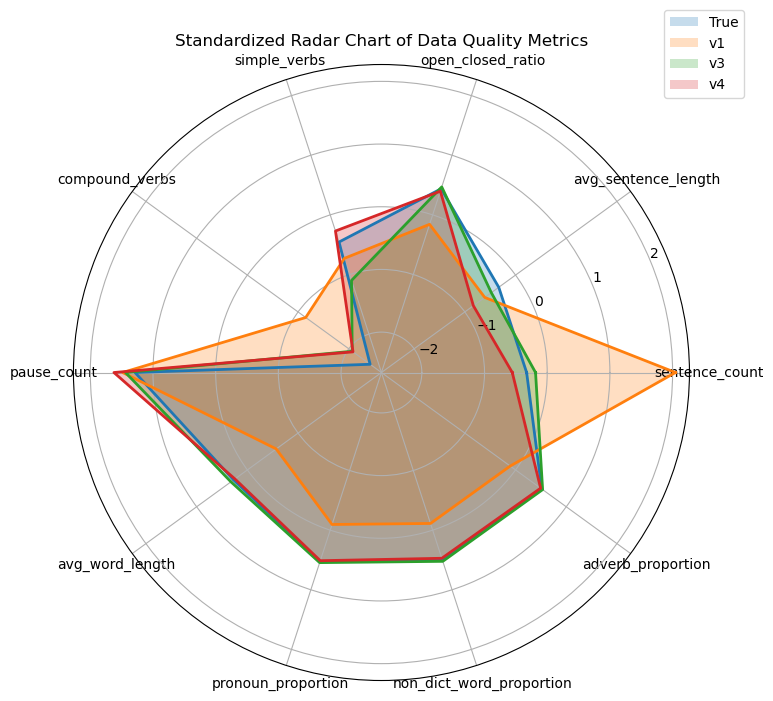

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Standardize the DataFrame (z-score normalization)
df_standardized = (df - df.mean()) / df.std()

# Prepare data for radar chart
categories = df_standardized.index.tolist()

# Append the first metric to close the loop
values_true = np.append(df_standardized['true'].values, df_standardized['true'].values[0])
values_v1 = np.append(df_standardized['v1'].values, df_standardized['v1'].values[0])
values_v3 = np.append(df_standardized['v3'].values, df_standardized['v3'].values[0])
values_v4 = np.append(df_standardized['v4'].values, df_standardized['v4'].values[0])

# Add the first category to close the chart
categories += [categories[0]]

# Define angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=True)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data for each version
ax.fill(angles, values_true, alpha=0.25, label='True', linewidth=2)
ax.plot(angles, values_true, linewidth=2)

ax.fill(angles, values_v1, alpha=0.25, label='v1', linewidth=2)
ax.plot(angles, values_v1, linewidth=2)

ax.fill(angles, values_v3, alpha=0.25, label='v3', linewidth=2)
ax.plot(angles, values_v3, linewidth=2)

ax.fill(angles, values_v4, alpha=0.25, label='v4', linewidth=2)
ax.plot(angles, values_v4, linewidth=2)

# Set labels on the correct number of ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories[:-1], fontsize=10)

plt.title("Standardized Radar Chart of Data Quality Metrics")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

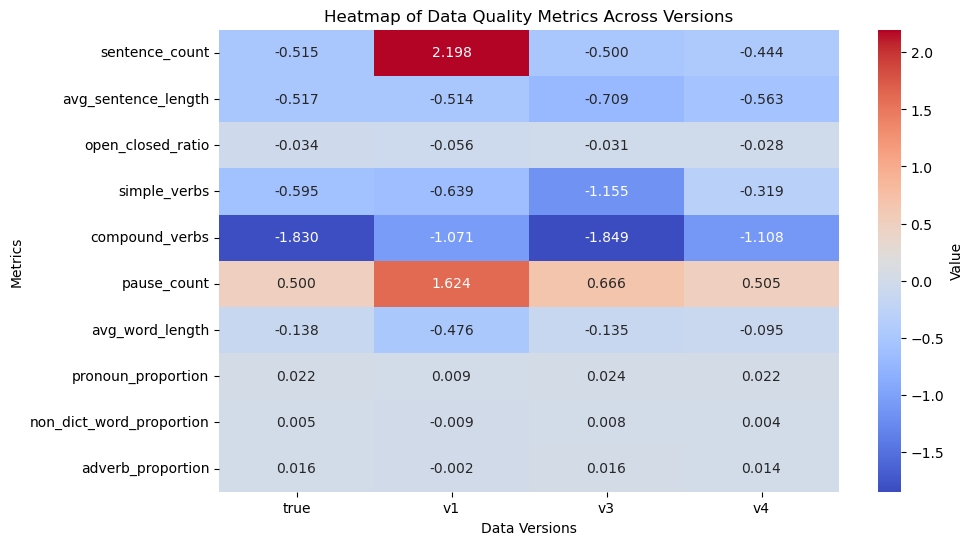

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f", cbar_kws={'label': 'Value'})

# Add title and labels
plt.title("Heatmap of Data Quality Metrics Across Versions")
plt.ylabel("Metrics")
plt.xlabel("Data Versions")
plt.show()